In [ ]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## for distances
from scipy.spatial.distance import cosine

In [ ]:
# Set pandas formatting options
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 500)

In [ ]:
# Set up wikidata API
!pip -q install qwikidata
!pip -q install sparqlwrapper

from qwikidata.entity import WikidataItem, WikidataLexeme, WikidataProperty
from qwikidata.linked_data_interface import get_entity_dict_from_api
import sys
import seaborn as sns
import folium # mapping
from folium.plugins import HeatMap
import missingno as msno
from SPARQLWrapper import SPARQLWrapper, JSON
import matplotlib.pyplot as plt
from typing import List, Dict

import warnings
warnings.filterwarnings('ignore')
print("Setup Complete")

Setup Complete


In [ ]:
# modified from https://itnext.io/extracting-data-from-wikidata-using-sparql-and-python-59e0037996f
import json
import ast

class WikiDataQueryResults:
    """
    A class that can be used to query data from Wikidata using SPARQL and return the results as a Pandas DataFrame or a list
    of values for a specific key.
    """
    def __init__(self, query: str):
        """
        Initializes the WikiDataQueryResults object with a SPARQL query string.
        :param query: A SPARQL query string.
        """
        self.user_agent = "WDQS-example Python/%s.%s" % (sys.version_info[0], sys.version_info[1])
        self.endpoint_url = "https://query.wikidata.org/sparql"
        self.sparql = SPARQLWrapper(self.endpoint_url, agent=self.user_agent)
        self.sparql.setQuery(query)
        self.sparql.setReturnFormat(JSON)

    def __transform2dicts(self, results: List[Dict]) -> List[Dict]:
        """
        Helper function to transform SPARQL query results into a list of dictionaries.
        :param results: A list of query results returned by SPARQLWrapper.
        :return: A list of dictionaries, where each dictionary represents a result row and has keys corresponding to the
        variables in the SPARQL SELECT clause.
        """
        new_results = []
        for result in results:
            print(result)
            break
            new_result = {}
            for key in result:
                new_result[key] = result[key]['value']
            new_results.append(new_result)
        return new_results

    # Function to remove invalid control characters
    def __remove_invalid_chars(text):
        return ''.join(char for char in text if ord(char) > 31 or char == '\n' or char == '\t')

    def _load(self) -> List[Dict]:
        """
        Helper function that loads the data from Wikidata using the SPARQLWrapper library, and transforms the results into
        a list of dictionaries.
        :return: A list of dictionaries, where each dictionary represents a result row and has keys corresponding to the
        variables in the SPARQL SELECT clause.
        """
        results = self.sparql.queryAndConvert()['results']['bindings']
        # Preprocess the JSON response to remove control characters
        results = json.dumps(results).encode('utf-8').decode('unicode_escape')

        return results

    def load_as_dataframe(self) -> pd.DataFrame:
        """
        Executes the SPARQL query and returns the results as a Pandas DataFrame.
        :return: A Pandas DataFrame representing the query results.
        """
        results = self._load()
        df = pd.read_json(results)
        df = df.applymap(lambda x: x['value'])
        return df

# Q1



## (a)

In [ ]:
# Some relations such as wdt:P1081 links to multiple values,
# Fortunately, calling ?country wdt:P1081 ?HDI will automatically return the latest HDI,

countryQuery = """
SELECT distinct ?countryLabel ?lifeExpectancy ?medianIncome ?HDI ?retirementAge ?unemploymentRate
WHERE {
  ?country wdt:P31 wd:Q6256.
  ?country wdt:P2250 ?lifeExpectancy.
  ?country wdt:P3529 ?medianIncome.
  ?country wdt:P1081 ?HDI.
  ?country wdt:P3001 ?retirementAge.
  ?country wdt:P1198 ?unemploymentRate.
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }

}
  ### YOUR CODE ENDS HERE

"""

## Output format is given below
Country_df = WikiDataQueryResults(countryQuery).load_as_dataframe()
Country_df

,medianIncome,retirementAge,unemploymentRate,lifeExpectancy,HDI,countryLabel
0,21959,65,16,80.87317,0.905,Spain
1,65000,67,6,82.5,0.951,Australia
2,34822,60,4,83.98488,0.925,Japan
3,44360,65,7,80.70488,0.929,Denmark
4,21959,65,16,83.578674,0.905,Spain
5,51489,67,3,82.50976,0.966,Norway
6,70336,65,7,83.62,0.936,Canada
7,307190,60,7.1,71.095,0.699,Philippines
8,43585,66,6.7,78.69024,0.921,United States of America
9,35562,65,6,81.61244,0.937,New Zealand


## (b)

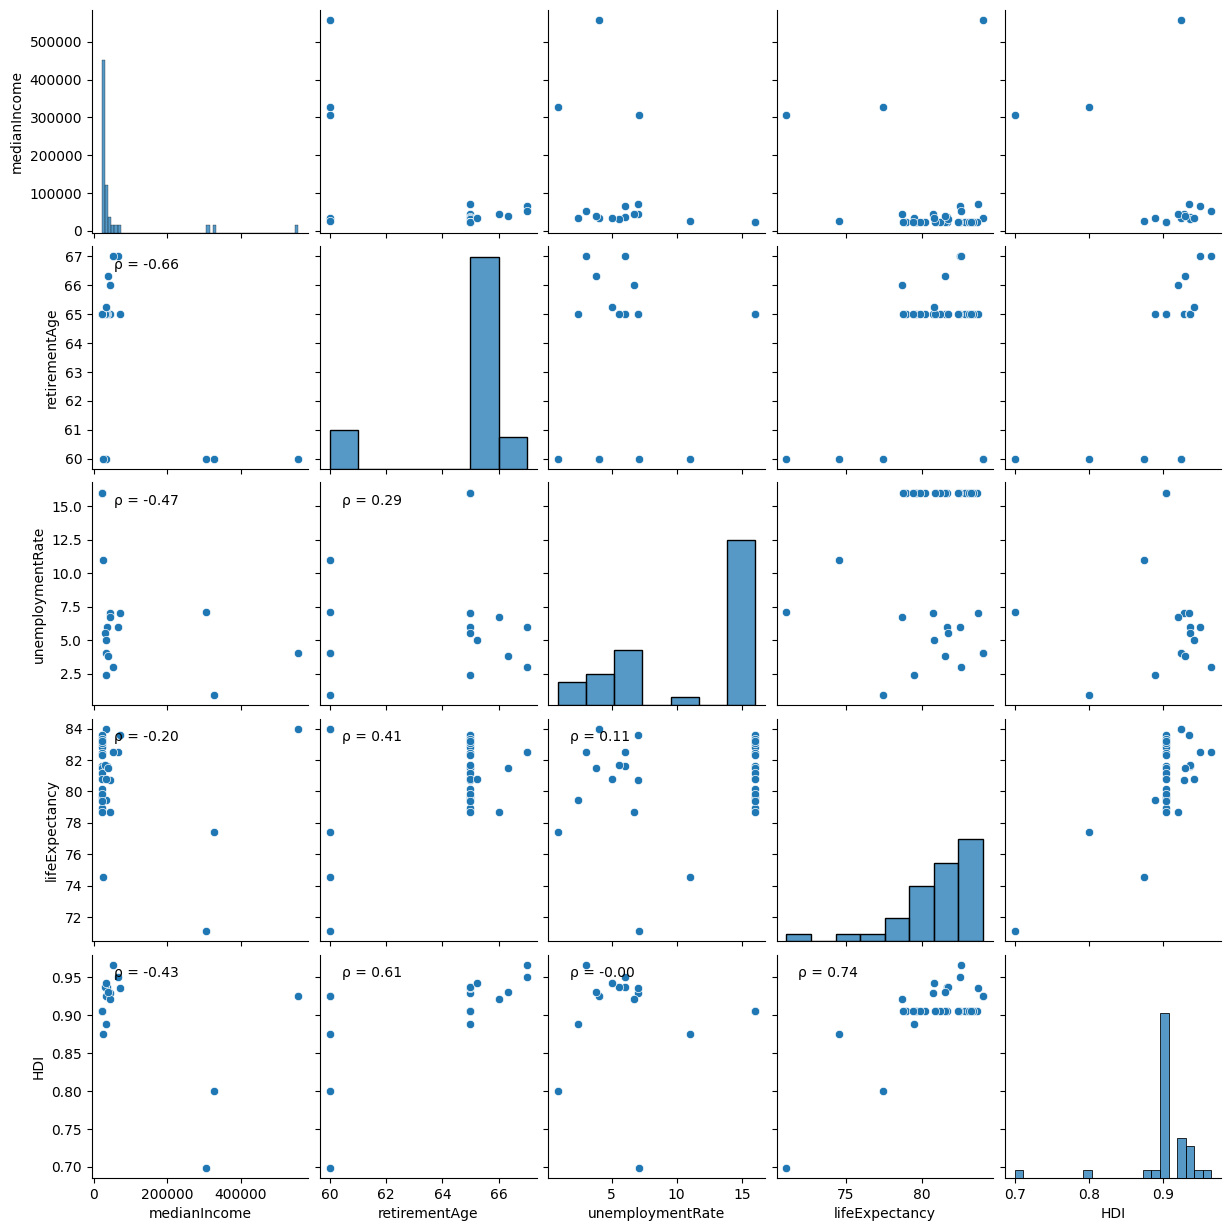

In [ ]:
from scipy.stats import pearsonr

def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

# get everything to numerical
Country_df=Country_df.drop(columns=['countryLabel'])
Country_df = Country_df.apply(pd.to_numeric)

# pairplot
## YOUR CODE STARTS HERE
g.fig.suptitle("Pairplot of to visualize relationshipes between pairs of country attributes",y=1)

## YOUR CODE ENDS HERE

g=sns.pairplot(Country_df)
g.map_lower(corrfunc)
plt.show()

## (c)

**Enter answer here:**
HDI and life expectancy have a strong correlation. This could be because HDI is a composite statistic of life expectancy, education and income so it shares information with life expectancy.

# Q2

## (a)

In [ ]:
actor_genre_Query = """
SELECT distinct ?movieLabel ?actorLabel ?genreLabel
WHERE {
  #actors who have won best actress
  ?movie wdt:P31 wd:Q11424;        # Instance of a film
         wdt:P136 ?genre;          # Genre - replace wd:Q130232. with the Wikidata ID for drama or comedy
         wdt:P161 ?actor.
  ?actor wdt:P166 wd:Q103618.          # Only Actors who have won best actress oscar
  ?movie wdt:P577 ?releaseDate.
  FILTER(YEAR(?releaseDate) > 1995 && YEAR(?releaseDate) < 2023)
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}
  limit 2000
  ## YOUR CODE ENDS HERE

"""

## Output format is given below
actor_genre_df = WikiDataQueryResults(actor_genre_Query).load_as_dataframe()
actor_genre_df

,movieLabel,actorLabel,genreLabel
0,The Dark Knight Rises,Marion Cotillard,drama film
1,Midnight in Paris,Marion Cotillard,fantasy film
2,The Dark Knight Rises,Marion Cotillard,superhero film
3,Midnight in Paris,Marion Cotillard,romantic comedy
4,Innocence,Marion Cotillard,film based on literature
...,...,...,...
1995,Fireflies in the Garden,Julia Roberts,drama film
1996,Charlie Wilson's War,Julia Roberts,spy film
1997,Charlie Wilson's War,Julia Roberts,political drama
1998,Eat Pray Love,Julia Roberts,comedy drama


## (b)

Text(0.5, 1.0, 'Normalized distribution of genres for movies featuring Nicole Kidman')

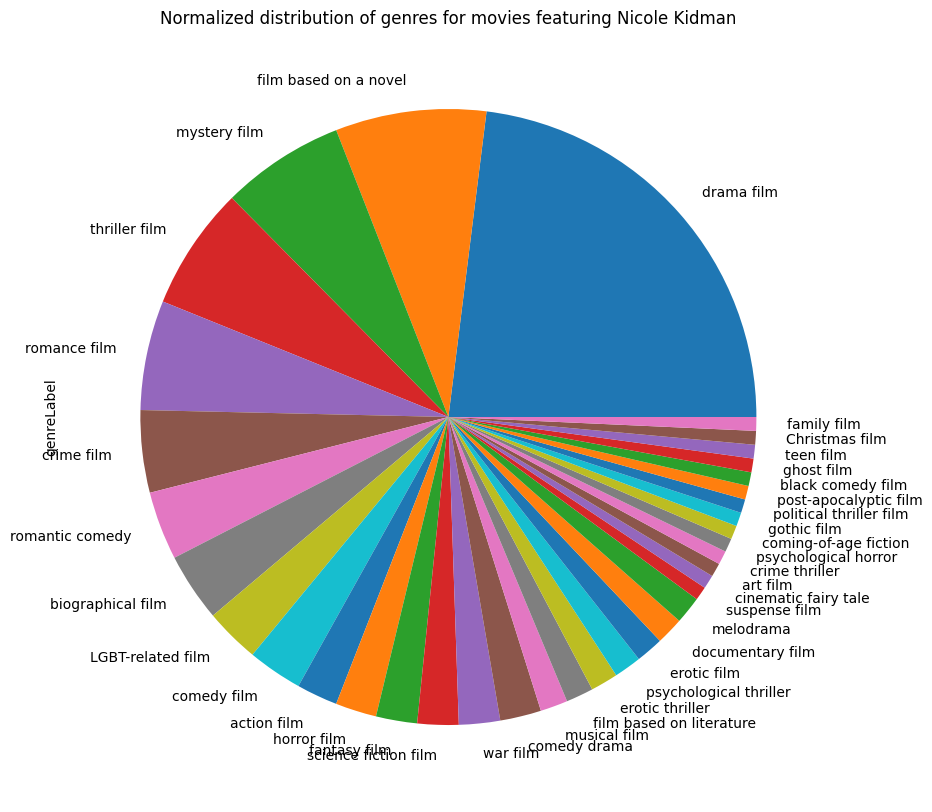

In [ ]:
## YOUR CODE STARTS HERE
MI_df = actor_genre_df.copy()
actor_movie_matrix = pd.pivot_table(MI_df, index='actorLabel', columns='genreLabel', aggfunc='size', fill_value=0)
genre_matrix = MI_df.groupby('actorLabel').max()
actor_movie_matrix = actor_movie_matrix.merge(genre_matrix, left_index=True, right_index=True)
actor_movie_matrix.sort_values(by="actorLabel",ascending=True)
actor_movie_matrix.sort_values(by="genreLabel",ascending=True)

Nicole_movie_df= actor_genre_df[actor_genre_df["actorLabel"]=="Nicole Kidman"].copy()

Nicole_genre_counts = Nicole_movie_df['genreLabel'].value_counts()
Nicole_normalized_genre_vector = Nicole_genre_counts/Nicole_genre_counts.sum()
Nicole_normalized_genre_vector.plot(kind='pie' , figsize=(15,10))
plt.title('Normalized distribution of genres for movies featuring Nicole Kidman')

## (c)

In [ ]:
# Output should be a dataframe with columns "Actor1", "Actor2", "Cosine Similarity",
# Print Top 15, sorted by "Cosine Similarity", then "Actor1", then "Actor2" all in Descending Order

# Initialize an empty list to store the results
similarity_results = []
# hint, similarity_results = [ (actors1, actors2, cosine_similarity_score), ... ]

## YOUR CODE STARTS HERE
def actor_cosine_similarity(vector1, vector2):
  # Combine the indices (genres) and remove duplicates
  all_genres = vector1.index.union(vector2.index)

  # Reindex both series to have the same genres
  actor1_series = vector1.reindex(all_genres, fill_value=0)
  actor2_series = vector2.reindex(all_genres, fill_value=0)

  # Calculate the cosine similarity
  # scipy.spatial.distance.cosine is cosine distance
  # cosine similarity is just (1 - cosine distance)
  pair_cosine_similarity = 1 - cosine(actor1_series, actor2_series)
  return pair_cosine_similarity

actor_movie_matrix_int = actor_movie_matrix.iloc[:, :-2]

for i in range(actor_movie_matrix_int.shape[0]):
  row = actor_movie_matrix_int.iloc[i]

  for j in range(i+1, actor_movie_matrix_int.shape[0]):
    row2 = actor_movie_matrix_int.iloc[j]

    cosine_similarity_score = actor_cosine_similarity(row, row2)
    similarity_results.append((actor_movie_matrix_int.index[i],actor_movie_matrix_int.index[j],cosine_similarity_score))




## YOUR CODE ENDS HERE
## Output format is given below

# Create a DataFrame for the results
similarity_df = pd.DataFrame(similarity_results, columns=['Actor1', 'Actor2', 'Cosine Similarity'])

# Sort the DataFrame
sorted_similarity_df = similarity_df.sort_values(by=['Cosine Similarity', 'Actor1', 'Actor2'], ascending=False)

# Display the sorted DataFrame
sorted_similarity_df.head(15)

,Actor1,Actor2,Cosine Similarity
492,Jane Wyman,Olivia de Havilland,1.000000
285,Elizabeth Taylor,Olivia de Havilland,1.000000
268,Elizabeth Taylor,Jane Wyman,1.000000
33,Anna Magnani,Olivia de Havilland,1.000000
16,Anna Magnani,Jane Wyman,1.000000
7,Anna Magnani,Elizabeth Taylor,1.000000
556,Julianne Moore,Nicole Kidman,0.946798
552,Julianne Moore,Marion Cotillard,0.939084
460,Hilary Swank,Julianne Moore,0.938167
164,Cate Blanchett,Natalie Portman,0.936435
